<h1 style="text-align:center">Coffee Sales</h1>

::: {.content-hidden}
# Library Imports and Style Configuration
:::

In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import catppuccin
import seaborn as sns
plt.style.use(catppuccin.PALETTE.latte.identifier)
%matplotlib inline

::: {.content-hidden}
# Data Loading
:::

In [2]:
df = pd.read_csv("index.csv")

# Data Exploration

## Data Preview

In [3]:
#| tbl-cap: "First 5 Rows of the Dataset" # <--- ADD THIS LINE
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Data Dimensions

In [4]:
rows, columns = df.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 1133 rows and 6 columns


## Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


::: {.content-hidden}
## Convert the datetime column into datetime datatype
:::

In [6]:
df["datetime"] = pd.to_datetime(df["datetime"])

## Data Time Range

In [7]:
start_date = df["datetime"].iloc[0]
end_date = df["datetime"].iloc[-1]
total_days = (end_date - start_date).days

print(f"The dataset spans {total_days} days of sales data (from {start_date.date()} to {end_date.date()}).")

The dataset spans 152 days of sales data (from 2024-03-01 to 2024-07-31).


## Total Sales (March 1, 2024 to July 31, 2024)

In [8]:
print(f"Total money earned {int(df.money.sum()):,} USD")

Total money earned 37,508 USD


# Payment Method Distribution

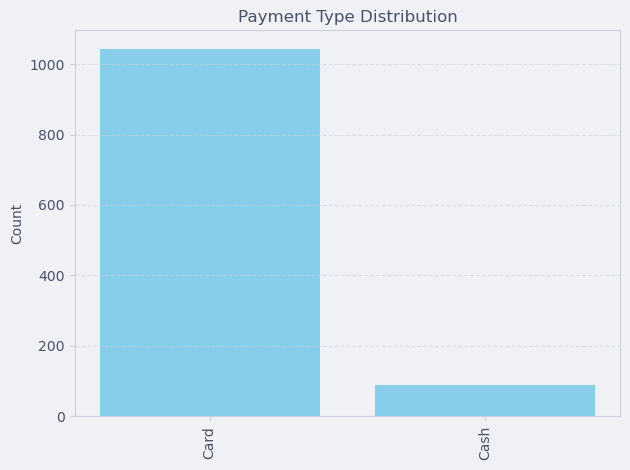

In [9]:
payment_counts = df["cash_type"].value_counts()
payment_types = [x.capitalize() for x in payment_counts.index]
counts = payment_counts.values

plt.bar(payment_types, counts, color="skyblue")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Payment Type Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Coffee Sales Distribution

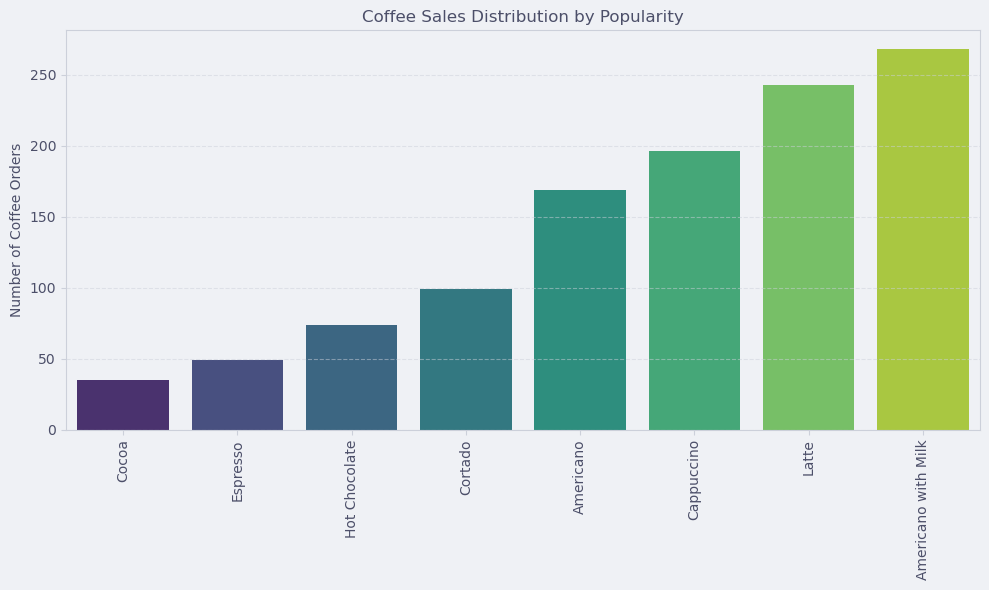

In [10]:
def coffee_dist(
    sort_type: str = "value", ascending: bool = True, title: str = "Coffee Distribution"
):
    counts = df["coffee_name"].value_counts()

    if sort_type == "index":
        counts = counts.sort_index(ascending=ascending)
    elif sort_type == "value":
        counts = counts.sort_values(ascending=ascending)
    else:
        raise ValueError("`sort_type` must be 'index' or 'value'.")

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=counts.index,
        y=counts.values,
        hue=counts.index,
        palette="viridis",
        legend=False,
    )
    plt.xticks(rotation=90)
    plt.xlabel("")
    plt.ylabel("Number of Coffee Orders")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


coffee_dist(sort_type="value", title="Coffee Sales Distribution by Popularity")
# coffee_dist(sort_type="index", ascending=False, title="Coffee Sales Distribution (Alphabetical Descending)")

# Total Sales by Coffee Type

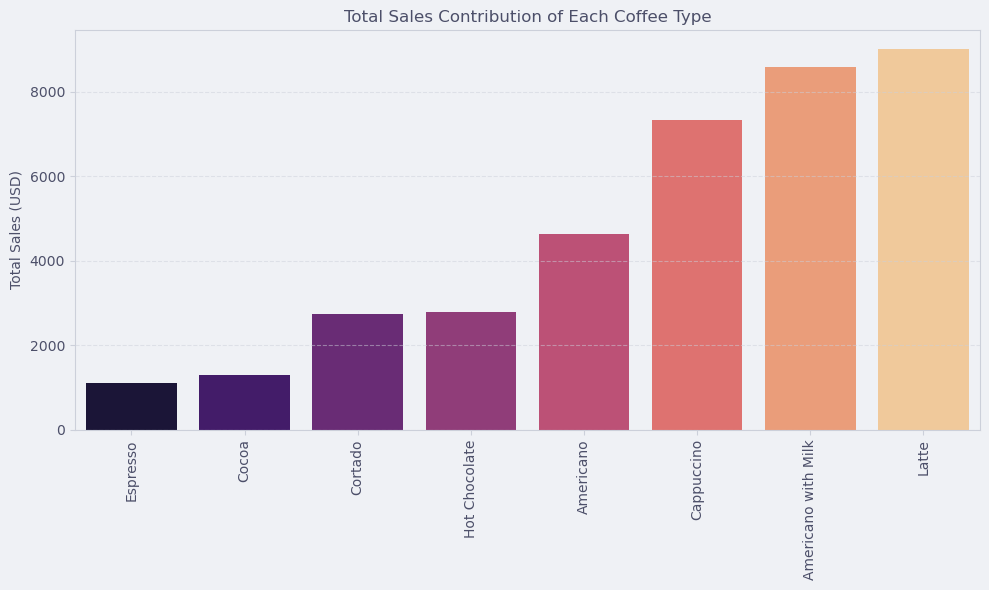

In [11]:
def sales_dist_per_coffee(sort_type: str = "value", ascending: bool = True, title: str = "Total Sales Per Coffee"):
    """
    Generates a bar plot showing the total sales for each coffee type using Seaborn.

    Args:
        sort_type (str): How to sort the bars. 'value' to sort by total sales,
                         'index' to sort alphabetically by coffee name.
        ascending (bool): Whether to sort in ascending or descending order.
        title (str): The title of the plot.
    """
    sales_per_coffee = df.groupby("coffee_name")["money"].sum()

    if sort_type == "index":
        sales_per_coffee = sales_per_coffee.sort_index(ascending=ascending)
    elif sort_type == "value":
        sales_per_coffee = sales_per_coffee.sort_values(ascending=ascending)
    else:
        raise ValueError("`sort_type` must be 'index' or 'value'.")

    plt.figure(figsize=(10, 6)) # Set up the figure size

    # Use sns.barplot and pass hue=sales_per_coffee.index to avoid FutureWarning
    ax = sns.barplot(
        x=sales_per_coffee.index,
        y=sales_per_coffee.values,
        hue=sales_per_coffee.index, # This resolves the FutureWarning
        palette='magma',             # A nice color palette for sales
        legend=False                 # We don't need a legend when hue is the x-axis
    )

    plt.xticks(rotation=90)
    plt.ylabel("Total Sales (USD)")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Remove the default x-axis label from Seaborn
    ax.set_xlabel(None)

    plt.tight_layout()
    plt.show()

# Example usage (assuming 'df' is your DataFrame, for instance):
# df = pd.DataFrame({
#     'coffee_name': ['Latte', 'Espresso', 'Latte', 'Cappuccino', 'Espresso', 'Latte'],
#     'money': [4.5, 3.0, 4.5, 5.0, 3.0, 4.5]
# })
sales_dist_per_coffee(sort_type="value", title="Total Sales Contribution of Each Coffee Type")

# Monthly Sales Trend

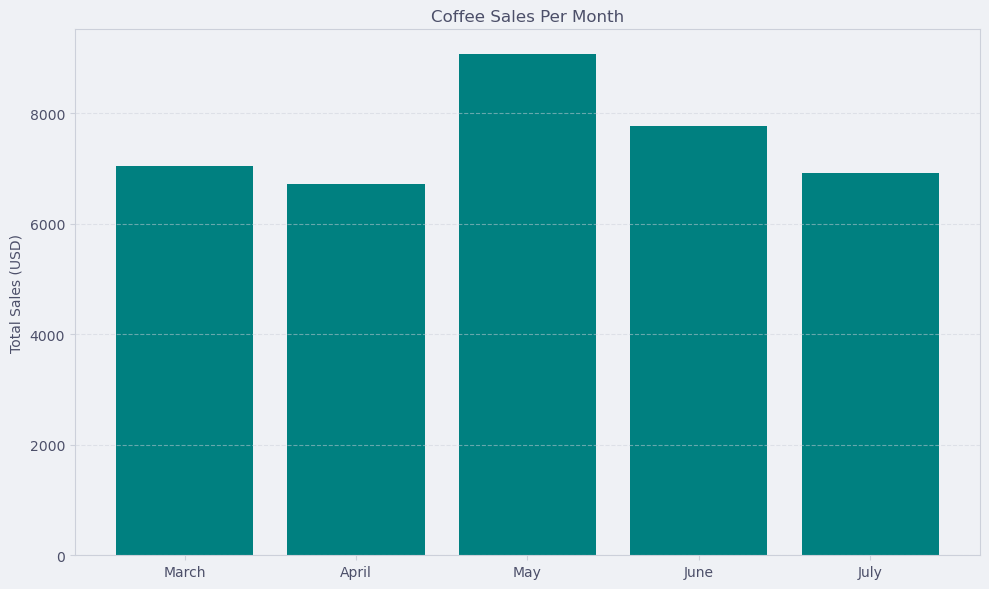

In [12]:
monthly_sales = df.set_index("datetime").groupby(pd.Grouper(freq="ME"))["money"].sum()
month_names = monthly_sales.index.strftime("%B")
plt.figure(figsize=(10, 6))
plt.bar(month_names, monthly_sales.values, color="teal")
plt.ylabel("Total Sales (USD)")
plt.title("Coffee Sales Per Month")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Monthly Sales Comparison Across Coffee Types

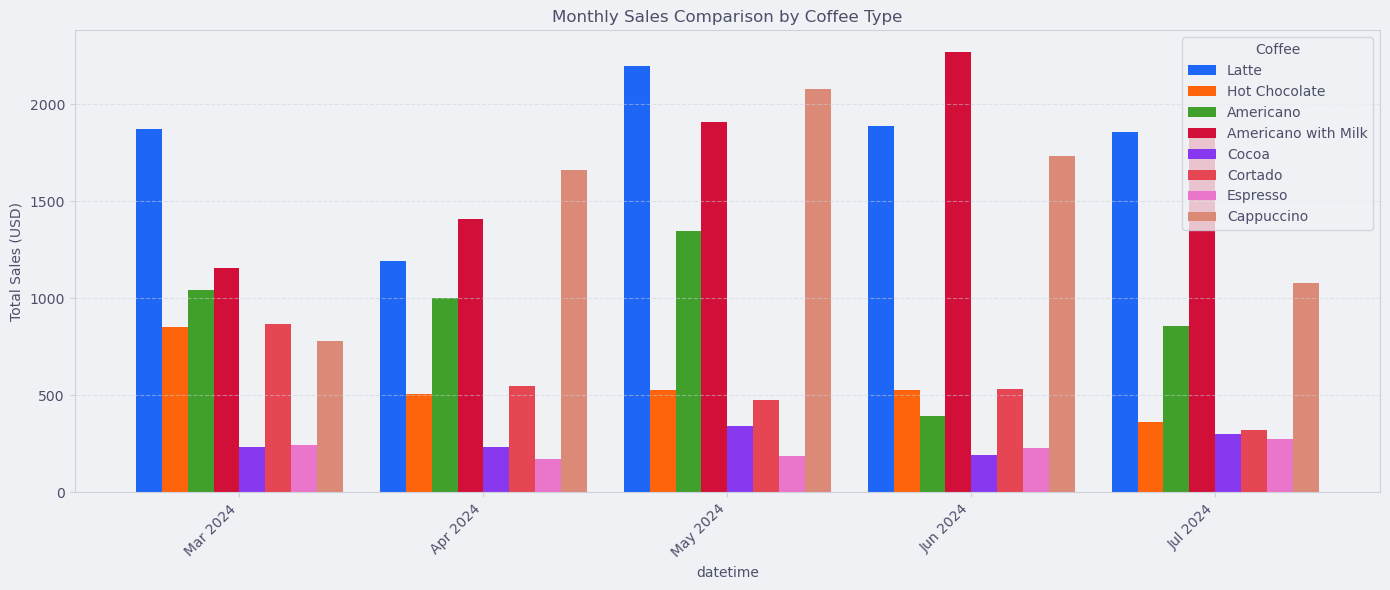

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def sales_comparison_bar_plot(coffee_list: list):
    if not pd.api.types.is_datetime64_any_dtype(df["datetime"]):
        df["datetime"] = pd.to_datetime(df["datetime"])

    filtered_df = df[df["coffee_name"].isin(coffee_list)]

    monthly_sales = (
        filtered_df.set_index("datetime")
        .groupby([pd.Grouper(freq="ME"), "coffee_name"])["money"]
        .sum()
        .unstack(fill_value=0)
    )

    monthly_sales = monthly_sales.reindex(columns=coffee_list, fill_value=0)

    monthly_sales.index = monthly_sales.index.strftime("%b %Y")

    plt.figure(figsize=(14, 6))
    ax = monthly_sales.plot(kind="bar", figsize=(14, 6), width=0.85, ax=plt.gca())

    plt.title("Monthly Sales Comparison by Coffee Type")
    plt.ylabel("Total Sales (USD)")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Coffee")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


coffee_types = [
    "Latte",
    "Hot Chocolate",
    "Americano",
    "Americano with Milk",
    "Cocoa",
    "Cortado",
    "Espresso",
    "Cappuccino",
]
sales_comparison_bar_plot(coffee_types)

# Weekly Sales: Weekday vs. Weekend Comparison

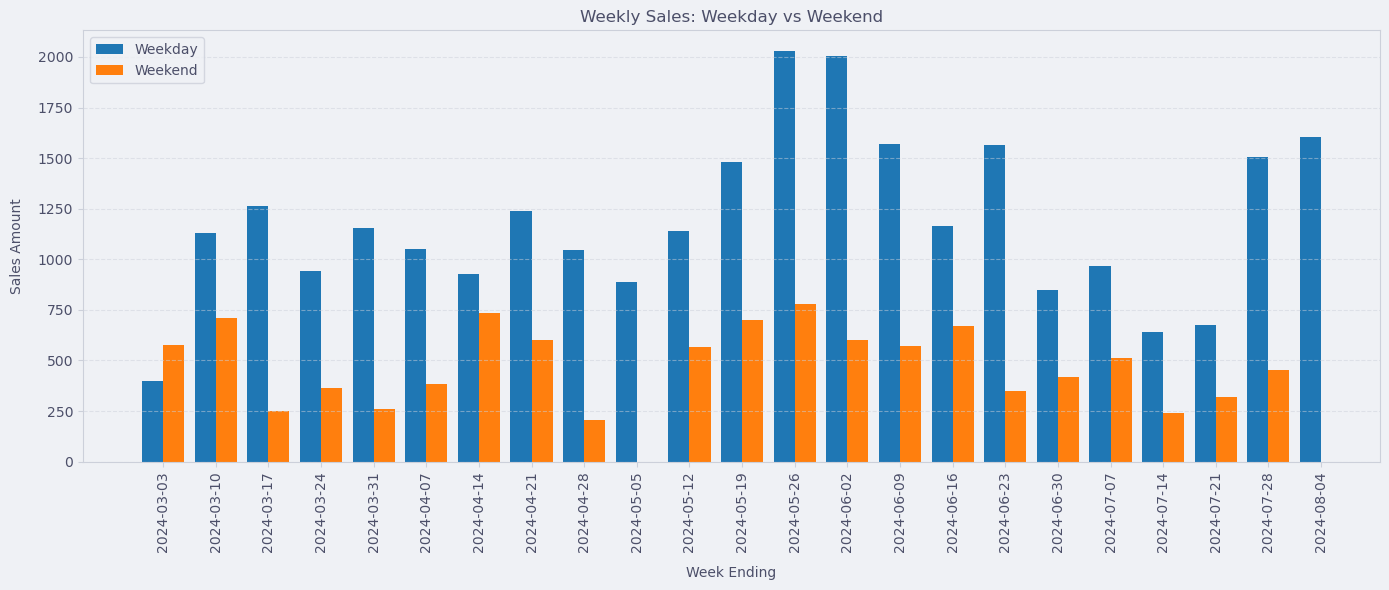

In [14]:
df_weekday = df[df["datetime"].dt.weekday < 5]
df_weekend = df[df["datetime"].dt.weekday >= 5]


weekday_sales = df_weekday.set_index("datetime").resample("W")["money"].sum()
weekend_sales = df_weekend.set_index("datetime").resample("W")["money"].sum()


weekly_sales = pd.DataFrame({
    "Weekday": weekday_sales,
    "Weekend": weekend_sales
})


fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4
x = range(len(weekly_sales))


ax.bar([i - bar_width/2 for i in x], weekly_sales["Weekday"], width=bar_width, label="Weekday", color="#1f77b4")
ax.bar([i + bar_width/2 for i in x], weekly_sales["Weekend"], width=bar_width, label="Weekend", color="#ff7f0e")


ax.set_xticks(x)
ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in weekly_sales.index], rotation=45)
plt.xticks(rotation=90)


ax.set_title("Weekly Sales: Weekday vs Weekend")
ax.set_xlabel("Week Ending", labelpad=10)
ax.set_ylabel("Sales Amount", labelpad=10)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()